<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Modeltf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install joblib
import tensorflow as tf 
import pickle
#from sklearn.externals import joblib
import numpy as np
from tensorflow.python.client import device_lib
from tensorflow.saved_model import simple_save
import random
import matplotlib.pyplot as plt 
import math
import warnings
from sklearn.model_selection import train_test_split

In [98]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
## 64 BIT (2253,4016)
'''
with open('/content/drive/My Drive/ffeatures64.bin','rb') as file:
  features = pickle.load(file)
with open('/content/drive/My Drive/flabels64.bin','rb') as file:
  labels = pickle.load(file)
'''

In [0]:
## 16 BIT (2253,267)

features = joblib.load('/content/features16.pkl')
labels = joblib.load('/content/labels16.pkl')

In [41]:
# print(features[0])
# print(len(features[0]))
# print(len(features))
print(np.shape(features))

(2253, 267)


In [0]:
## TEST SET 

x_train_t, x_test_t,y_train_t, y_test_t = train_test_split(features, labels, test_size = 0.3)

In [0]:
tf.reset_default_graph()

In [46]:
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6761836458860782146
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2143717569663648930
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 16380417520566726801
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14892338381
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12548314707451594968
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [0]:
x = tf.placeholder(shape = (None,267), dtype = tf.float32, name = 'input' )
y = tf.placeholder(shape = (None,1), dtype = tf.float32, name = 'output')

wh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((267, 500)))
bh = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,500)))

#out

wo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((500,1)))
bo = tf.Variable(tf.glorot_uniform_initializer(dtype = tf.float32)((1,1)))


                

In [0]:
hidl = tf.add(tf.matmul(x,wh),bh)

In [0]:
outl = tf.add(tf.matmul(hidl,wo),bo)

Add additional custom loss functions if necc 

In [0]:
loss = tf.reduce_mean(tf.square(tf.subtract(y,outl)))
#default lr = 0.001
opt = tf.train.AdamOptimizer(name = 'optimizer')
op_train = opt.minimize(loss, name ='train_op')

In [0]:
saved = tf.train.Saver().as_saver_def()

In [0]:
init = tf.global_variables_initializer()

In [116]:
train=[]
val=[]
with tf.device('/device:CPU:0'):
  save = tf.train.Saver()
  with tf.Session() as sess:
    sess.run(init)
    mini =[]
    for i in range(0,1000):
      b1=[]
      b2=[]
      l1=[]
      l2=[]
      b1_val=[]
      b2_val=[]
      l1_val=[]
      l2_val=[]
      x_traint, x_test_t,y_traint, y_test_t = train_test_split(features, labels, test_size = 0.3)
      x_trainv, x_testv, y_trainv, y_testv = train_test_split(x_traint, y_traint, test_size = 0.3)
      
      for j in range(16): ##One run is appending 2 random lists 
        
        ##TRAINING MINI BATCHES 
        
        seed = random.choice(range(len(x_trainv)))
        i = random.choice(range(len(x_trainv)))
        
        b1.append(x_trainv[seed])
        b2.append(x_trainv[i])
        l1.append(y_trainv[seed])
        l2.append(y_trainv[i])
        
        x_batch = np.vstack((b1,b2))
        y_batch = np.vstack((l1,l2))
        
        ##VALIDATION MINI BATCHES 
        
        seed_val = random.choice(range(len(x_traint)))
        i_val = random.choice(range(len(x_traint)))
        
        b1_val.append(x_traint[seed_val])
        b2_val.append(x_traint[i_val])
        l1_val.append(y_traint[seed_val])
        l2_val.append(y_traint[i_val])
        
        x_batch_val = np.vstack((b1_val,b2_val))
        y_batch_val = np.vstack((l1_val,l2_val))
      
      ## TRAINING LOSS
      z= sess.run([loss,op_train], feed_dict = {x : x_batch, y: y_batch })
      train.append(z[0])
      ##VALIDATION LOSS
      z_val= sess.run([loss], feed_dict = {x : x_batch_val, y: y_batch_val })
      val.append(z_val[0])
      
      print(str(z[0]) + '\t' + str(z_val[0]))
    
    
    simple_save(sess,'/content/drive/My Drive/Custom_Models/model1000',inputs = {'input' : x}, outputs = {'output': outl})
    print('Saved model!')
    

3391.9875	2351.6987
2316.7363	3338.1807
1811.5679	1516.5627
2847.2043	2962.9634
1349.2678	719.892
704.0217	1499.6946
1144.2983	1069.795
894.20557	1567.3832
314.12793	1508.3737
178.13005	480.10236
231.52429	245.5902
701.65936	1509.809
981.6389	432.04822
421.4903	1104.5347
520.3796	1410.2098
628.27167	300.4619
546.32245	474.9154
1294.2535	891.5953
894.4134	554.3406
1016.1853	1209.2711
1836.2107	465.41025
389.12802	706.1942
370.3839	857.312
802.16003	764.22174
1156.9794	255.26776
245.17436	816.22815
304.43088	1441.7561
1608.3561	1651.4832
244.52751	268.18518
868.51843	722.4864
542.28186	287.25275
306.0354	795.7919
594.28845	270.21362
965.95544	738.317
186.34155	699.7557
228.22925	1281.5076
666.1169	297.8327
262.06244	155.36406
1379.2498	1976.3112
196.21468	318.17947
184.68417	1269.4032
455.95795	821.74554
1147.385	2367.8774
168.92247	737.2742
255.62704	372.01428
190.71222	256.1651
306.23743	390.5264
1521.0321	1492.7197
293.2045	251.8285
524.6801	670.0765
166.93033	1385.2365
1314.3153	207.

In [0]:
with open('/content/drive/My Drive/Custom_Models/graph1000.pb', 'wb') as f:
  f.write(tf.get_default_graph().as_graph_def().SerializeToString())

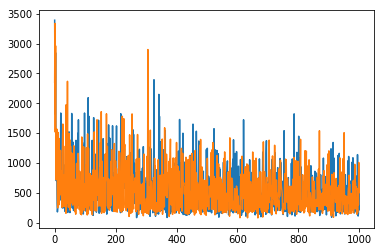

In [118]:
plt.plot(train)
plt.plot(val)

In [119]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(267, 500) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(1, 500) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(500, 1) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(1, 1) dtype=float32_ref>]

TypeError: ignored